In [209]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import pylab
from scipy.stats import linregress
%config InlineBackend.figure_format='svg'

## Box F

8.765450120963107e-17 1.4095565965774672e-07


Text(0.2,0.75,'intercept (1/R$^{2}$): 1e-07$\\Omega$$^{-1}$')

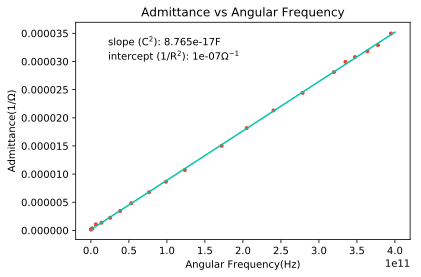

In [51]:
freqs = np.array([603, 1006, 7010, 12750, 18800, 25300,\
            31200, 36700, 44050, 50000, 55930, 66000, 72050, 78000, 84000,\
            90000, 92100, 93800, 96000, 97800, 100000])
R = np.array([2290, 2290, 1740, 1200, 870, 670, 560, 470,\
            390, 340, 310, 260, 240, 220, 207, 193, 187, 183, 180, 177, 173])
V_1 = np.array([2.02, 2, 2.1, 2.26, 2.38, 2.45, 2.48, 2.52, 2.56,\
            2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6])
V_2 = np.array([1.9, 2, 2.2, 2.82, 2.42, 2.46, 2.58, 2.6, 2.6,\
            2.6, 2.64, 2.62, 2.66, 2.64, 2.66, 2.66, 2.66, 2.64, 2.64, 2.64, 2.66])
phi = np.array([4, 6, 41, 54, 66, 71, 75, 76, 78, 79, 80, 82, 83,\
            82, 82, 83, 83, 83, 84, 84])

w = (np.pi*2*freqs)**2
I = (V_2 / R)
Z = (V_1 / I)
Y = 1/Z**2


# print(I)
# print(Z)
# print(w)

plt.plot(w, Y, '.', color = 'xkcd:tomato')

def mod(w, C, r):
    return(w*C + r)
init_guess = [0, 1]

fit = scipy.optimize.curve_fit(mod, w, Y, p0 = init_guess)
ans, cov = fit
fit_C, fit_r = ans

z = np.linspace(0, 4e11)
plt.plot(z, mod(z, fit_C, fit_r), color = 'xkcd:turquoise')

plt.title('Admittance vs Angular Frequency')
plt.xlabel('Angular Frequency(Hz)')
plt.ylabel('Admittance(1/$\Omega$)')
print(fit_C, fit_r)
plt.figtext(0.2, 0.8, "slope (C$^{2}$): %.3eF"%fit_C)
plt.figtext(0.2, 0.75, "intercept (1/R$^{2}$): %.e$\Omega$$^{-1}$"%fit_r)

## Box E

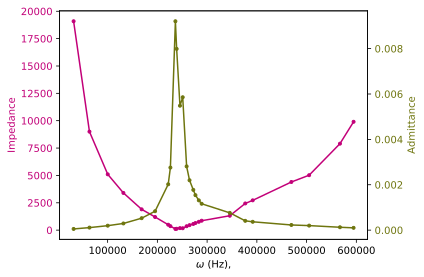

-1661.140169486427

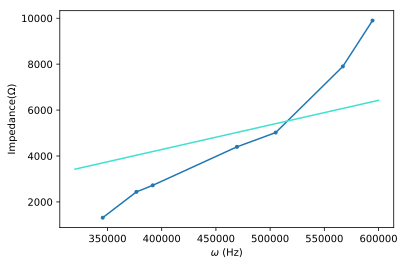

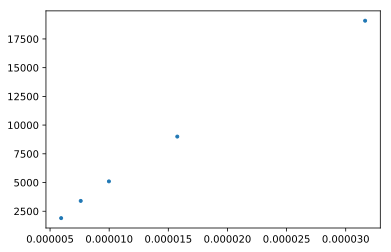

In [213]:
freqs_E = np.array([96, 499, 1000, 5030, 10100, 15950, 20960,\
            26800, 31100, 35300, 36000, 37600, 38000, 39060, 39940, \
            41190, 42120, 43330, 44010, 45090, 46000, 55000, 59950, \
            62340, 74710, 80390, 90250, 94610])
R_E = np.array([2700000, 1240000, 107000, 19300, 9000, 5100, 3400, \
            1900, 1200, 495, 367, 107, 127, 180, 250, 360, 460, 570, 670, \
            770, 870, 1300, 2510, 2800, 4400, 5070, 7900, 9900])
V_E1 = np.array([5.6, 6.4, 7.12, 7.20, 7.36, 7.44, 7.44, 7.44, 7.44, 7.12, \
            6.96, 5.36, 5.52, 6.16, 4.48, 6.96, 7.12, 7.28, 7.28, 7.44, 7.44, \
            7.76, 8.24, 8.40, 9.44, 10.1, 12.5, 14.5])
V_E2 = np.array([5.6, 6.48, 7.2, 7.28, 7.36, 7.44, 7.44, 7.44, 7.44, 7.12, \
            7.04, 5.28, 5.60, 6.08, 6.56, 7.04, 7.2, 7.36, 7.52, 7.52, 7.52, \
            7.68, 8.48, 8.64, 9.44, 10.2, 12.5, 14.5])
phi_E = np.array([39, 73, 72, 83, 83, 84, 85, 86, 84, 80, 77, 16, 34.5, 60, \
            69.6, 78, 82, 84.2, 85.8, 87.2, 88.1, 91.4, 99.2, 101, 110, 115, 128, 135])
w_E = np.pi*2*freqs_E
I_E = (V_E2 / R_E)
Z_E = (V_E1 / I_E)
Y_E = 1/Z_E
z = Z_E**2
y = Y_E**2
v = w_E**2
n = 1/v

fig, ax1 = plt.subplots()
color = 'xkcd:magenta'
ax1.set_xlabel('$\omega$ (Hz),', color = 'k')
ax1.set_ylabel('Impedance', color = color)
ax1.plot(w_E[3:], Z_E[3:], '.-', color = color)
ax1.tick_params(axis='y', labelcolor = color)

ax2 = ax1.twinx()
color = 'xkcd:olive'
ax2.set_ylabel('Admittance', color = color)
ax2.plot(w_E[3:], Y_E[3:], '.-', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

plt.figure(1)
plt.plot(w_E[21:], Z_E[21:], '.-')

# plt.figure(1)
# plt.plot(n[:7], z[:7], '.', c = 'xkcd:sienna')
# plt.xlabel('1/$\omega$$^{2}$')
# plt.ylabel('Z$^{2}$')
# plt.title('low freq')

# plt.figure(2)
# plt.plot(v[20:], z[20:], '.', c = 'xkcd:sienna')
# plt.xlabel('$\omega$$^{2}$')
# plt.ylabel('Z$^{2}$')
# plt.title('high freq')
w = w_E[20:]
p = Z_E[20:]
w_inv = 1 / w_E[3:8]
z_low = Z_E[3:8]
def modE(w, a):
    return(a*w)
init_guess = [0]

fit = scipy.optimize.curve_fit(modE, w, p, p0 = init_guess)
ans, cov = fit
fit_a = ans

z = np.linspace(320000, 600000)
plt.plot(z, modE(z, fit_a), c = 'turquoise')
plt.xlabel('$\omega$ (Hz)')
plt.ylabel('Impedance($\Omega$)')

plt.figure(2)
plt.plot(w_inv, z_low, '.')

linregress(w_inv, z_low)[1]

# def modE_low(w_inv, c, d):
#     return((c*w_inv) + d)
# init_guess = [0, 0]

# fit = scipy.optimize.curve_fit(modE_low, w_inv, z_low, p0 = init_guess)
# ans, cov = fit
# fit_c, fit_d = ans

# x = np.linspace(0, 0.000035, 1000)
# plt.plot(x, modE_low(x, fit_c, fit_d))

# print(fit_a, fit_b, fit_c, fit_d)
# plt.ylabel('Admittance')
# plt.xlabel('Angular freq')

## Box B

21328.47506522806 -1.707674003282905e-08


Text(0,0.5,'Y$^{2}$')

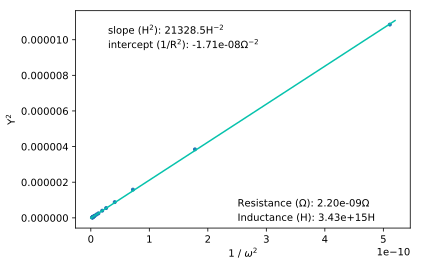

In [132]:
freqs_B = np.array([7040, 11930, 18760, 24900, 31110, 36100, 44050, 50030, \
            60200, 66180, 72000, 77900, 83900, 90230, 91020, 94100, 95850, 98050, 100200])
R_B = np.array([310, 510, 810, 1110, 1370, 1600, 2000, 2300, 2800, 3200, 3400, \
            4000, 4600, 5300, 5300, 5700, 6100, 6500, 6700])
V_B1 = np.array([1.185, 1.25, 1.265, 1.275, 1.31, 1.32, 1.36, 1.375, 1.43, 1.49, \
            1.53, 1.57, 1.625, 1.72, 1.735, 1.79, 1.84, 1.91, 1.96])
V_B2 = np.array([1.21, 1.25, 1.29, 1.33, 1.33, 1.34, 1.37, 1.395, 1.43, 1.48, 1.485, \
            1.545, 1.625, 1.73, 1.72, 1.78, 1.845, 1.92, 1.93])
phi_B = np.array([79, 82.7, 85.8, 87.8, 88.6, 91, 90.9, 95.5, 99.5, 103, 104.5, 107.5, \
            111.5, 116, 116, 119, 121, 123, 124])

w_B = np.pi*2*freqs_B
I_B = (V_B2 / R_B)
Z_B = (V_B1 / I_B)
Y_B = 1/Z_B
y = Y_B**2
v = w_B**2
n = 1/v

plt.plot(n, y, '.')
def modB(n, l, b):
    return(n*l + k)
init_guess = [0, 0]

fit = scipy.optimize.curve_fit(mod, n, y, p0 = init_guess)
ans, cov = fit
fit_l, fit_k = ans

z = np.linspace(0, 5.2e-10)
plt.plot(z, mod(z, fit_l, fit_k), color = 'xkcd:turquoise')

print(fit_l, fit_k)
plt.figtext(0.2, 0.8, "slope (H$^{2}$): %.1fH$^{-2}$"%fit_l)
plt.figtext(0.2, 0.75, "intercept (1/R$^{2}$): %.2e$\Omega$$^{-2}$"%fit_k)

RB = 1 / fit_l**2
LB = 1 / fit_k**2
plt.figtext(0.5, 0.2, "Resistance ($\Omega$): %.2e$\Omega$"%RB)
plt.figtext(0.5, 0.15, "Inductance (H): %.2eH"%LB)

plt.xlabel('1 / $\omega$$^{2}$')
plt.ylabel('Y$^{2}$')